In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Load data

164 = pregnant <br>
165 = pregnant <br>
166 = virgin <br>
167 = virgin <br>
... exported unmodified / without thresholding from our app

In [122]:
%%time
df_167 = pd.read_feather('/Users/kohlj/Desktop/receptor_maps/167_virgin.feather')
# df_166 = pd.read_feather('/Users/kohlj/Desktop/receptor_maps/166_virgin.feather')
df_164 = pd.read_feather('/Users/kohlj/Desktop/receptor_maps/164_pregnant.feather')
df_165 = pd.read_feather('/Users/kohlj/Desktop/receptor_maps/165_pregnant.feather')
df_167.head()

CPU times: user 1.36 s, sys: 746 ms, total: 2.11 s
Wall time: 1.11 s


,Class,X,Y,Z,Esr1 (Opal 480): Num Spots,Prg (Opal 520): Num Spots,Prlr (Opal 570): Num Spots,Oxt (Opal 620): Num Spots,Acronym,BrainRegion,Image
0,Positive,13.1758,3.2241,3.5607,2,0,0,0,NaN,NaN,PW167-A26_Scan1_Section11.tsv
1,Positive,13.1758,3.2799,3.5766,1,0,0,0,NaN,NaN,PW167-A26_Scan1_Section11.tsv
2,Positive,13.1758,3.2821,3.5902,2,0,0,0,NaN,NaN,PW167-A26_Scan1_Section11.tsv
3,Positive,13.1758,3.2942,3.5974,3,0,0,0,NaN,NaN,PW167-A26_Scan1_Section11.tsv
4,Positive,13.1758,3.3039,3.6020,1,0,0,0,NaN,NaN,PW167-A26_Scan1_Section11.tsv


## Get Spot Distributions

In [107]:
# shorten column names
df_167.rename(columns = {'Esr1 (Opal 480): Num Spots':'Esr1', 'Prg (Opal 520): Num Spots':'PR', 
                         'Prlr (Opal 570): Num Spots':'Prlr', 'Oxt (Opal 620): Num Spots':'Oxtr'}, inplace = True)
df_167.head()

In [109]:
# check that we in fact only have cells from the region of interest; and total number of labels
print(df_167.Acronym.unique())

[NaN, 'PRM', 'FOTU', 'COPY', 'MY', ..., 'AOBmi', 'FRP2/3', 'AOBgr', 'von', 'FRP1']
Length: 670
Categories (669, object): ['AAA', 'ACAd1', 'ACAd2/3', 'ACAd5', ..., 'von', 'vtd', 'x', 'y']


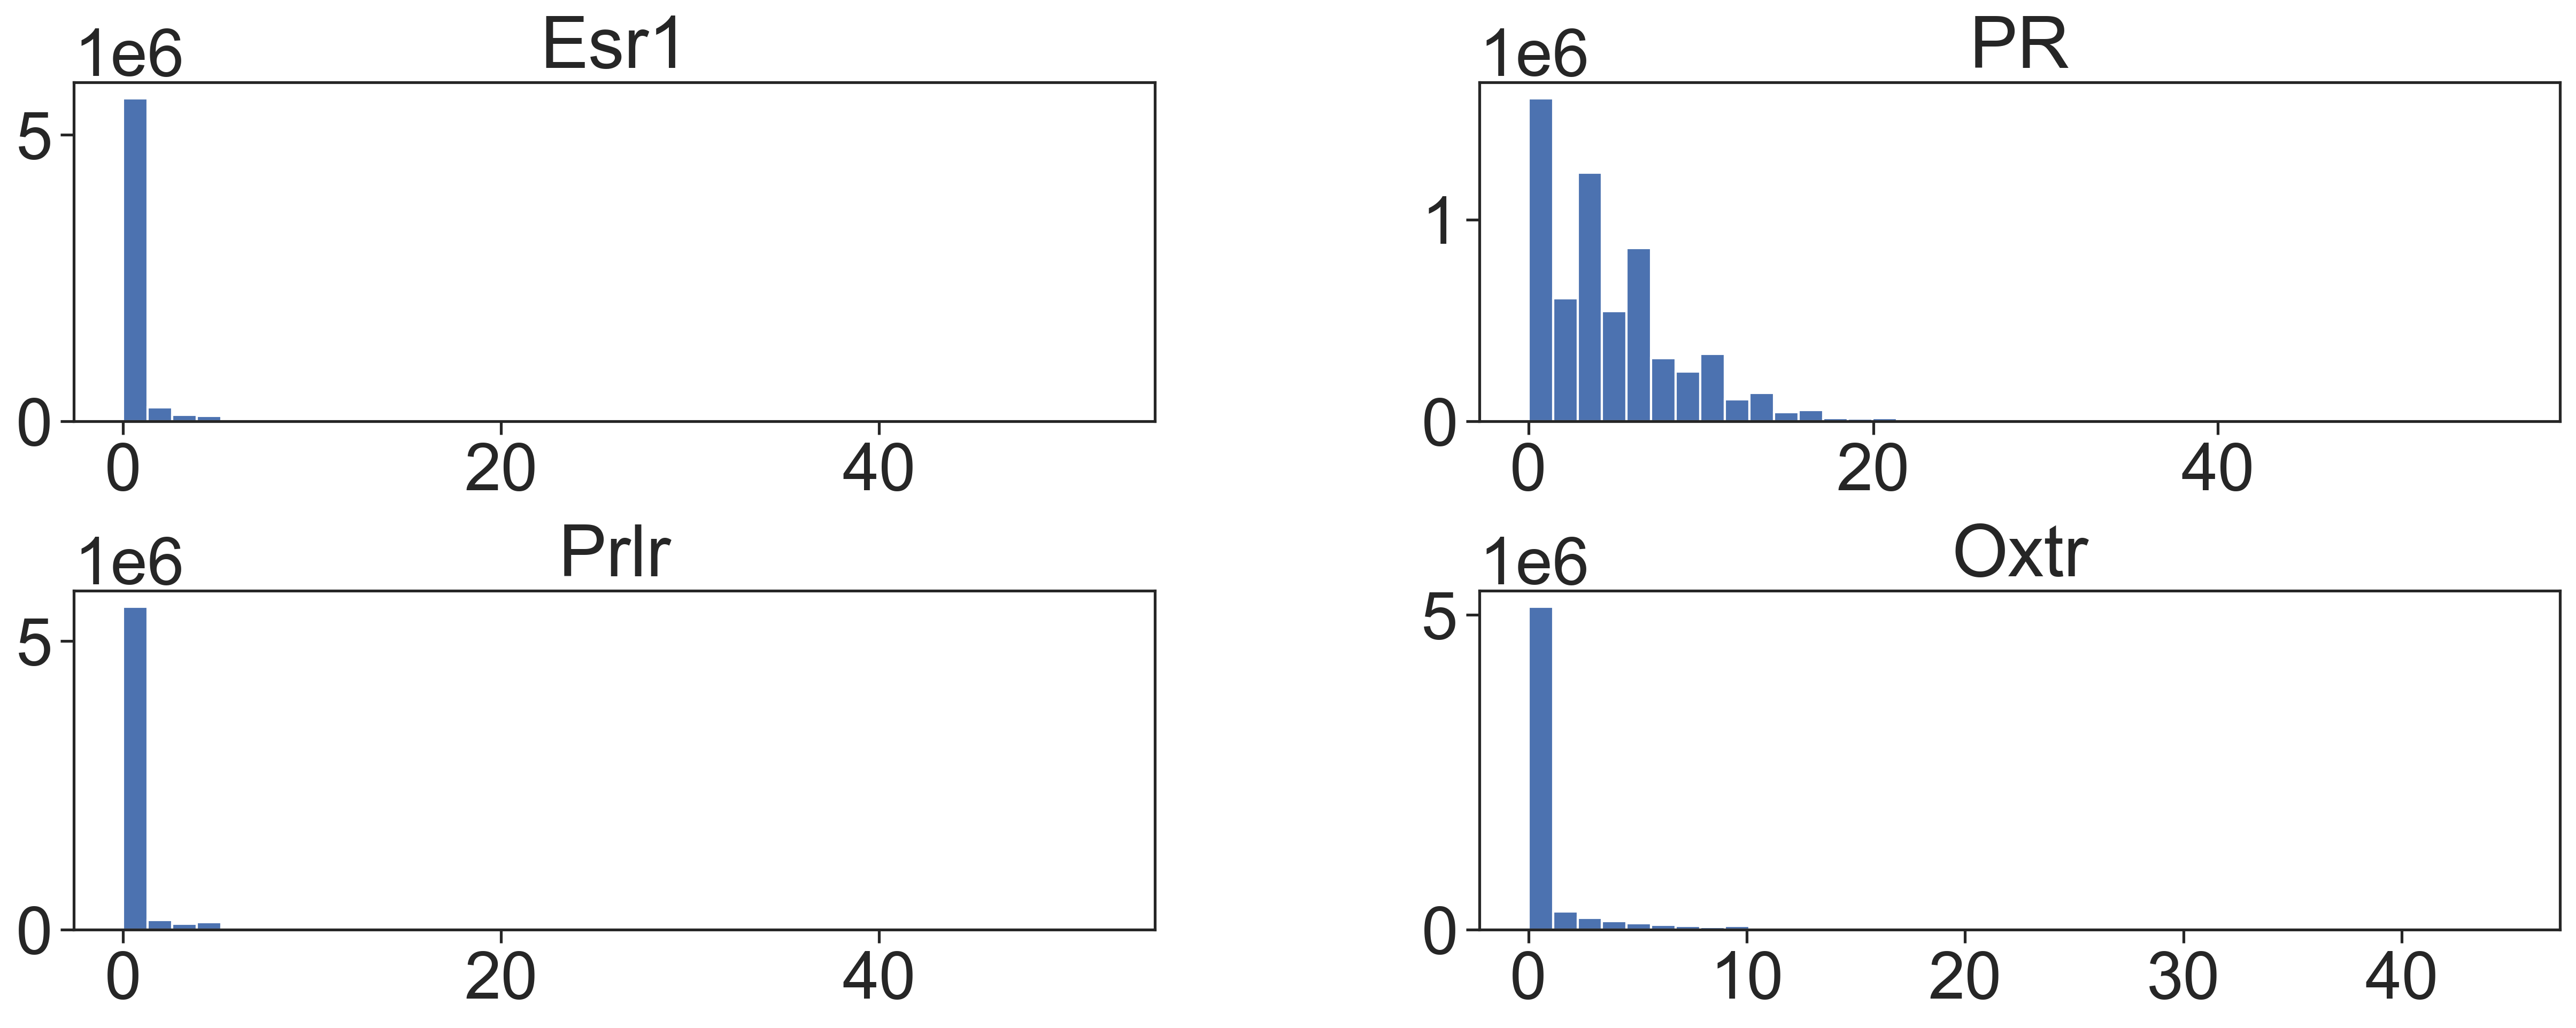

In [110]:
df_167[['Esr1', 'PR', 'Prlr', 'Oxtr']].hist(bins=40, grid=False, layout=(2, 2), figsize=(20, 7));
plt.subplots_adjust(hspace = 0.5)

#### Stats for each brain area/label

In [111]:
areas = df_167.groupby('Acronym')

Ranking of mean receptor expression

In [117]:
esr1_mean = df_167.groupby('Acronym')['Esr1'].mean().sort_values(ascending=False).reset_index() # reset_index() creates df
esr1_mean.head(10)

,Acronym,Esr1
0,PD,8.194915
1,VMPO,7.778549
2,MPN,6.646124
3,PVpo,6.460025
4,och,3.243405
5,OV,3.219512
6,MPO,3.052782
7,ARH,2.934871
8,ASO,2.493976
9,IG,2.472934


In [121]:
esr1_mean.loc[esr1_mean['Acronym'] == 'ADP']

,Acronym,Esr1
66,ADP,1.119968


In [88]:
pr_mean = df_167.groupby('Acronym')['PR'].mean().sort_values(ascending=False).reset_index() # reset_index() creates df
pr_mean.head(20)

,Acronym,PR
0,c,9.833333
1,VMPO,9.827932
2,XII,9.678903
3,MOp5,9.573057
4,AMBd,9.451163
5,ILA6b,9.412371
6,AIv6b,9.333333
7,ICB,9.218750
8,PL6b,8.982379
9,ACAd5,8.853520


In [89]:
prlr_mean = df_167.groupby('Acronym')['Prlr'].mean().sort_values(ascending=False).reset_index() # reset_index() creates df
prlr_mean.head(10)

,Acronym,Prlr
0,OV,10.390244
1,VMPO,10.328704
2,SG,9.500000
3,PD,8.673729
4,AVPV,8.371668
5,MPN,8.012366
6,PVpo,7.575646
7,MEPO,7.222868
8,LSc,7.099678
9,B,6.357143


In [96]:
oxtr_mean = df_167.groupby('Acronym')['Oxtr'].mean().sort_values(ascending=False).reset_index() # reset_index() creates df
oxtr_mean.head(10)

,Acronym,Oxtr
0,AOBgr,6.511996
1,B,5.892857
2,AON,5.739908
3,aco,5.096483
4,MA,4.901303
5,lotd,4.794003
6,ILA1,4.771458
7,TTd,4.203079
8,TR,3.845915
9,PA,3.722861


## Organize Data

In [7]:
dfl = df.melt(
    id_vars=['Acronym', 'X', 'Y', 'Z'],
    value_vars=['Esr1', 'PR', 'Prlr', 'Oxtr'],
    value_name='NumSpots',
    var_name='HormoneReceptor'
)
dfl.head(-10)

,Acronym,X,Y,Z,HormoneReceptor,NumSpots
0,MPO,5.8118,6.0434,4.7529,Esr1,1
1,MPO,5.8118,5.9931,4.7587,Esr1,5
2,MPO,5.8118,6.0236,4.7608,Esr1,0
3,MPO,5.8118,6.1061,4.7851,Esr1,0
4,MPO,5.8118,6.0563,4.7956,Esr1,0
...,...,...,...,...,...,...
27101,MPO,4.7249,6.2542,5.4258,Oxtr,3
27102,MPO,4.7249,6.1007,5.4177,Oxtr,0
27103,MPO,4.7249,6.2136,5.4434,Oxtr,12
27104,MPO,4.7249,6.1845,5.4637,Oxtr,18


### Fractions of receptor-positive neurons

#### Single receptors - using a threshold of >0 for positive

In [15]:
print(f"\n{round((len(df[df['Esr1'] > 0]) / len(df)),2)*100}% of MPOA neurons express Esr1.")
print(f"\n{round((len(df[df['PR'] > 0]) / len(df)),2)*100}% of MPOA neurons express PR.")
print(f"\n{round((len(df[df['Prlr'] > 0]) / len(df)),2)*100}% of MPOA neurons express Prlr.")
print(f"\n{round((len(df[df['Oxtr'] > 0]) / len(df)),2)*100}% of MPOA neurons express Oxtr.")


59.0% of MPOA neurons express Esr1.

97.0% of MPOA neurons express PR.

86.0% of MPOA neurons express Prlr.

31.0% of MPOA neurons express Oxtr.


#### Pairs

In [37]:
esr1 = df[df['Esr1'] > 0]
pr = df[df['PR'] > 0]
prlr = df[df['Prlr'] > 0]
oxtr = df[df['Oxtr'] > 0]

In [55]:
print (f"\033[1mEsr1 / PR\033[0m")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1 and PR.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0)]) / len(esr1)),2)*100}% of Esr1 neurons also express PR.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0)]) / len(pr)),2)*100}% of PR neurons also express Esr1.")

print (f"\n\033[1mEsr1 / Prlr\033[0m")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Prlr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1 and Prlr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Prlr'] > 0)]) / len(esr1)),2)*100}% of Esr1 neurons also express Prlr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Prlr'] > 0)]) / len(prlr)),1)*100}% of Prlr neurons also express Esr1.")

print (f"\n\033[1mEsr1 / Oxtr\033[0m")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1 and Oxtr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Oxtr'] > 0)]) / len(esr1)),2)*100}% of Esr1 neurons also express Oxtr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Oxtr'] > 0)]) / len(oxtr)),1)*100}% of Oxtr neurons also express Esr1.")

print (f"\n\033[1mPR / Prlr\033[0m")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Prlr'] > 0)]) / len(df)),1)*100}% of neurons co-express PR and Prlr.")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Prlr'] > 0)]) / len(pr)),2)*100}% of PR neurons also express Prlr.")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Prlr'] > 0)]) / len(prlr)),2)*100}% of Prlr neurons also express PR.")

print (f"\n\033[1mPR / Oxtr\033[0m")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express PR and Oxtr.")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Oxtr'] > 0)]) / len(pr)),2)*100}% of PR neurons also express Oxtr.")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Oxtr'] > 0)]) / len(Oxtr)),2)*100}% of Oxtr neurons also express PR.")

print (f"\n\033[1mPrlr / Oxtr\033[0m")
print(f"\n{round((len(df[(df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express Prlr and Oxtr.")
print(f"\n{round((len(df[(df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(Prlr)),2)*100}% of Prlr neurons also express Oxtr.")
print(f"\n{round((len(df[(df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(Oxtr)),2)*100}% of Oxtr neurons also express Prlr.")

Esr1 / PR

60.0% of neurons co-express Esr1 and PR.

98.0% of Esr1 neurons also express PR.

59.0% of PR neurons also express Esr1.

Esr1 / Prlr

50.0% of neurons co-express Esr1 and Prlr.

91.0% of Esr1 neurons also express Prlr.

60.0% of Prlr neurons also express Esr1.

Esr1 / Oxtr

20.0% of neurons co-express Esr1 and Oxtr.

34.0% of Esr1 neurons also express Oxtr.

60.0% of Oxtr neurons also express Esr1.

PR / Prlr

80.0% of neurons co-express PR and Prlr.

87.0% of PR neurons also express Prlr.

98.0% of Prlr neurons also express PR.

PR / Oxtr

30.0% of neurons co-express PR and Oxtr.

31.0% of PR neurons also express Oxtr.

30.0% of Oxtr neurons also express PR.

Prlr / Oxtr

30.0% of neurons co-express Prlr and Oxtr.

26.0% of Prlr neurons also express Oxtr.

26.0% of Oxtr neurons also express Prlr.


#### Triplets

In [57]:
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0) & (df['Prlr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1/PR/Prlr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1/Prlr/Oxtr.")
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1/PR/Oxtr.")
print(f"\n{round((len(df[(df['PR'] > 0) & (df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express PR/Prlr/Oxtr.")


50.0% of neurons co-express Esr1/PR/Prlr.

20.0% of neurons co-express Esr1/Prlr/Oxtr.

20.0% of neurons co-express Esr1/PR/Oxtr.

30.0% of neurons co-express PR/Prlr/Oxtr.


#### All four

In [56]:
print(f"\n{round((len(df[(df['Esr1'] > 0) & (df['PR'] > 0) & (df['Prlr'] > 0) & (df['Oxtr'] > 0)]) / len(df)),1)*100}% of neurons co-express Esr1/PR/Prlr/Oxtr.")


20.0% of neurons co-express Esr1/PR/Prlr/Oxtr.


## Plots

In [9]:
sns.set(rc={"figure.figsize": (10, 3)})
plt.rcParams['figure.dpi'] = 300
sns.set(font_scale=2.7) 
sns.set_style("ticks")

CPU times: user 771 ms, sys: 90.8 ms, total: 862 ms
Wall time: 584 ms


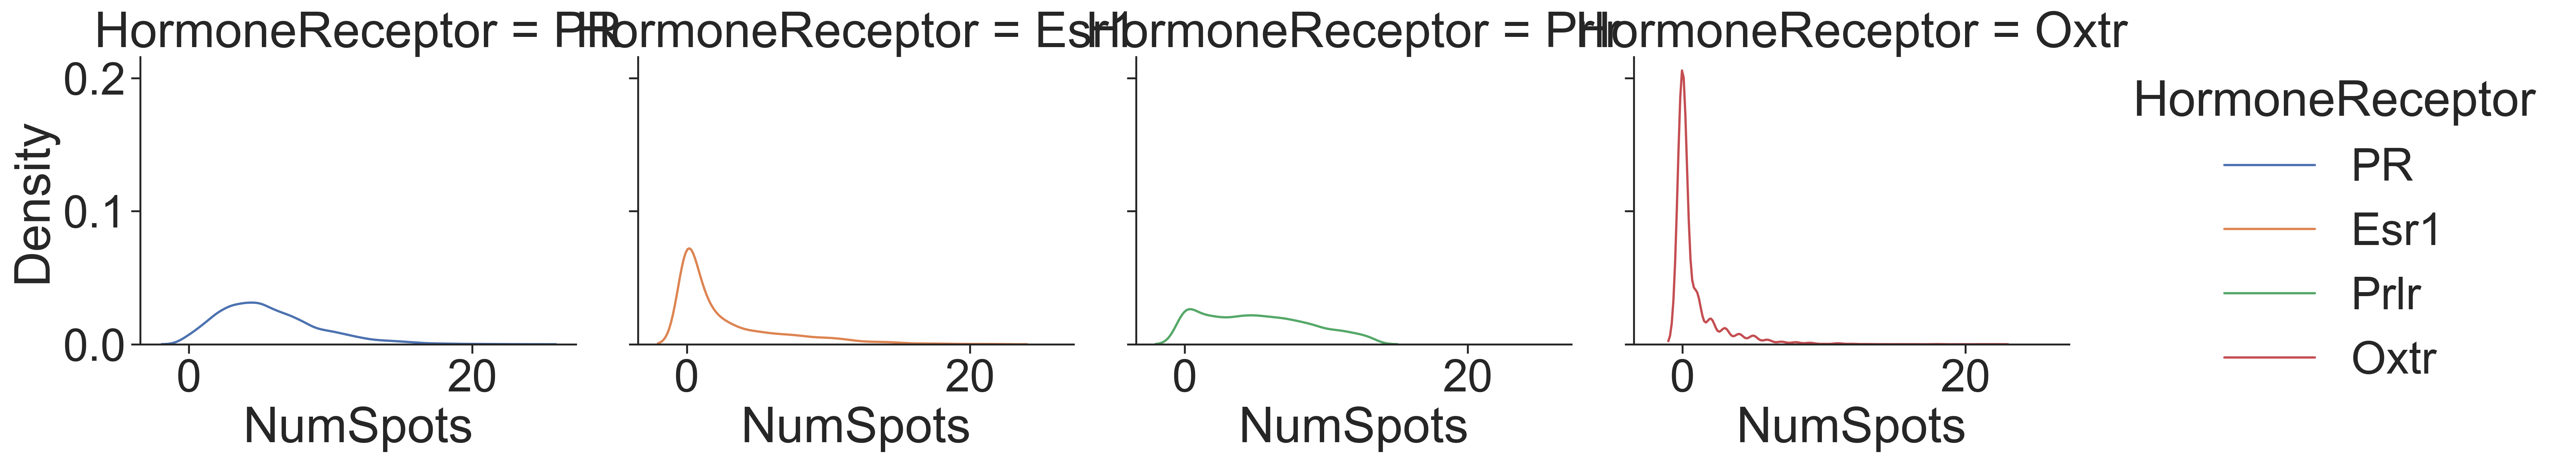

In [10]:
%%time
_ = sns.displot(data=dfl[dfl['NumSpots'] < 100].sample(20000), x='NumSpots', col='HormoneReceptor', 
                hue='HormoneReceptor', kind='kde');

In [11]:
%%time
brain_regions = ['MPO', 'MPN', 'V1', 'V3']
dd = dfl[dfl.Acronym.isin(brain_regions)].astype({'Acronym': str})
# plt.figure(figsize=(15, 3));
sns.catplot(data=dd.sample(50000), x='Acronym', y='NumSpots', hue='HormoneReceptor', height=5, aspect=5, kind='bar');
_ = plt.xticks(rotation=45);

ValueError: Cannot take a larger sample than population when 'replace=False'